# Project: Combined cycle power plant performance

### Abstract:
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

### Source:

Pınar Tüfekci, Çorlu Faculty of Engineering, Namık Kemal University, TR-59860 Çorlu, Tekirdağ, Turkey
Email: ptufekci '@' nku.edu.tr

Heysem Kaya, Department of Computer Engineering, Boğaziçi University, TR-34342, Beşiktaş, İstanbul, Turkey
Email: heysem '@' boun.edu.tr

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

### Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.



### Relevant Papers:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link]. ([Web Link])

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

### Citation Request:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link].
([Web Link])

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)



<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# showing versions
print('Python version:',python_version())
#print('Warnings version:',warnings._version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2
Scikit-learn version: 0.24.1
XGBoost version: 1.4.2


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_excel("Folds5x2_pp.xlsx")

In [4]:
# shape
df.shape

(9568, 5)

In [5]:
# showing first five rows of the dateset
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
# showing data types
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

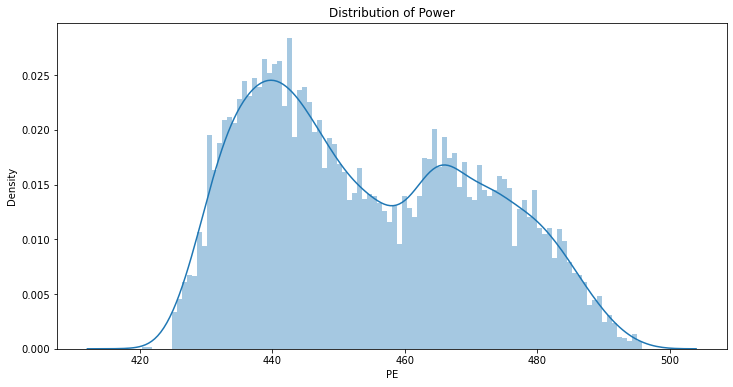

In [7]:
# plotting distribution of the target
plt.figure(figsize=(12,6))

ax = sns.distplot(df['PE'],bins=100)

plt.title('Distribution of Power')
plt.xlabel('PE')

plt.show()

In [8]:
# all of the dependent variables are the numerical variables
num_vars = [var for var in df.columns if var != 'PE']
num_vars

['AT', 'V', 'AP', 'RH']

In [9]:
# checking duplicated rows
df.duplicated().sum()

41

In [10]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

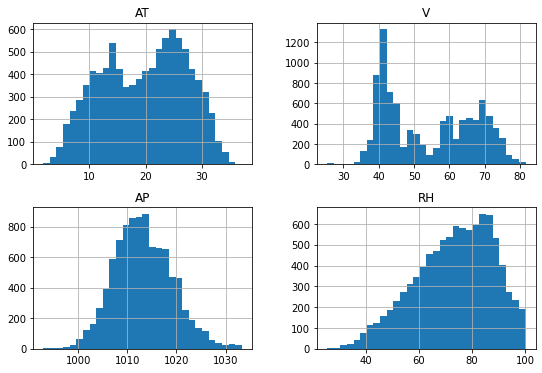

In [11]:
# plotting histograms for all continuous numerical variables
df[num_vars].hist(bins=30, figsize=(9,6))
plt.show()

In [12]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

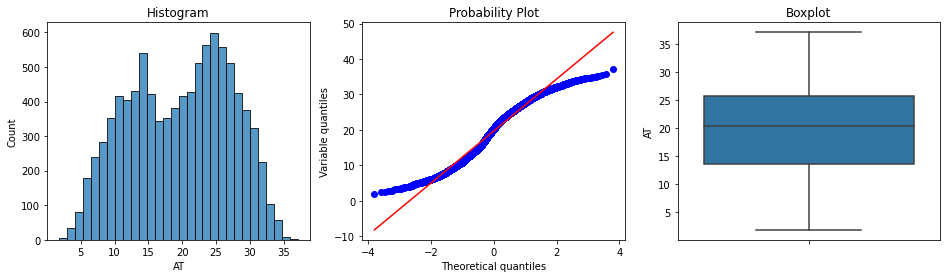

skewnessis of AT is -0.14


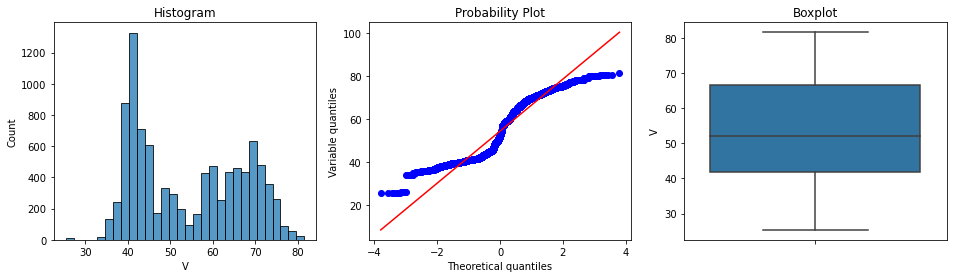

skewnessis of V is 0.20


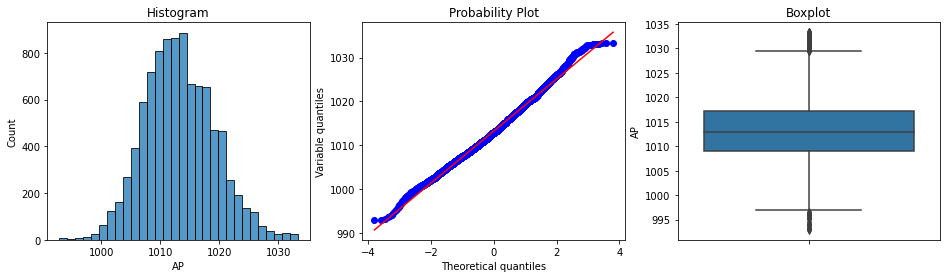

skewnessis of AP is 0.27


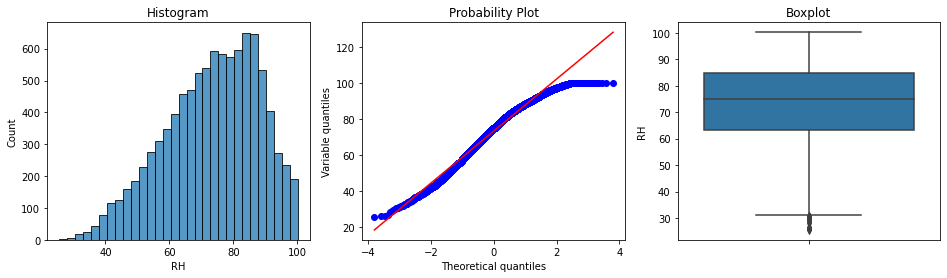

skewnessis of RH is -0.43


In [13]:
# plotting the variables
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("skewnessis of", variable, "is {:.2f}".format(skewness))

In [14]:
# statistical distribution
df.describe().round(1)

,AT,V,AP,RH,PE
count,9568.0,9568.0,9568.0,9568.0,9568.0
mean,19.7,54.3,1013.3,73.3,454.4
std,7.5,12.7,5.9,14.6,17.1
min,1.8,25.4,992.9,25.6,420.3
25%,13.5,41.7,1009.1,63.3,439.8
50%,20.3,52.1,1012.9,75.0,451.6
75%,25.7,66.5,1017.3,84.8,468.4
max,37.1,81.6,1033.3,100.2,495.8


<Figure size 432x288 with 0 Axes>

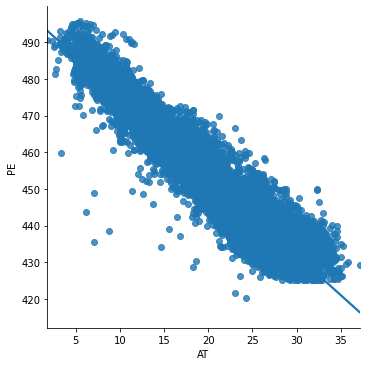

<Figure size 432x288 with 0 Axes>

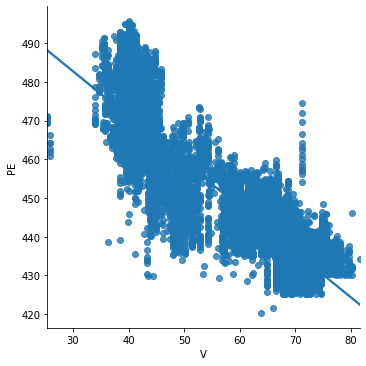

<Figure size 432x288 with 0 Axes>

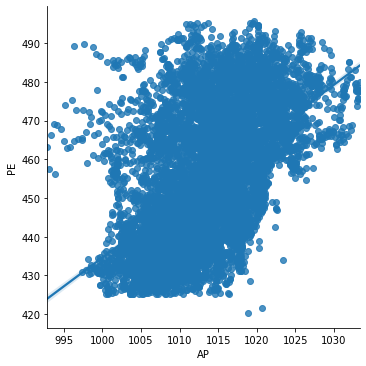

<Figure size 432x288 with 0 Axes>

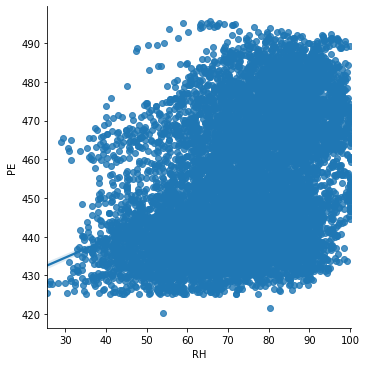

In [19]:
# plotting the correlation of the variables with the target 

for variable in num_vars:
    
    plt.figure(figsize=(6,4))
    
    sns.lmplot(x=variable, y='PE', data=df)
    #plt.scatter(df[variable], df['PE'])
    plt.ylabel('PE')
    plt.xlabel(variable)

                
    plt.show()

In [20]:
# calculating a correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


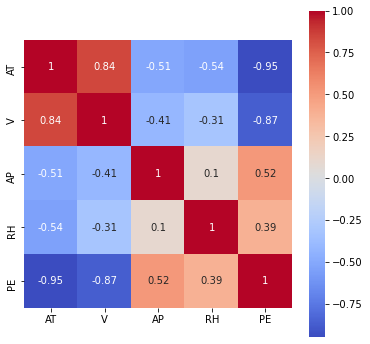

In [24]:
# drawing a heatmap
plt.figure(figsize = (6,6))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()